<a href="https://colab.research.google.com/github/Marina-Zakaria/Data-Mining-for-Wisconsin-Diagnostic-Breast-Cancer-WDBC-Data-Set/blob/master/dataClassification_paramTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part One : Data Import And Exploratiob

In [0]:
import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df=pd.read_csv(url)

In [2]:
df

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [0]:
df.columns=["ID","Diagnosis","Mean Radius","Mean texture","Mean perimeter","Mean area","Mean smoothness","Mean compactness","Mean concavity","Mean concave points","Mean symmetry","Mean fractal dimension",
            "radius","texture","perimeter","area","smoothness","compactness","concavity","concave points","symmetry","fractal dimension",
            "Worst Radius","Worst texture","Worst perimeter","Worst area","Worst smoothness","Worst compactness","Worst concavity","Worst concave points","Worst symmetry","Worst fractal dimension"]

In [4]:
df


,ID,Diagnosis,Mean Radius,Mean texture,Mean perimeter,Mean area,Mean smoothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,Mean fractal dimension,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,Worst Radius,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df['Mean area'].max()

2501.0

In [6]:
df['ID'][df['Diagnosis']=='M'].count()
df['ID'][df['Diagnosis']=='B'].count()

357

In [5]:
df['Diagnosis']=df['Diagnosis'].map({
    'M':1,
    'B':0
}.get)
df.head()

,ID,Diagnosis,Mean Radius,Mean texture,Mean perimeter,Mean area,Mean smoothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,Mean fractal dimension,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,Worst Radius,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


#Part Two : Data Visualization

In [0]:
from matplotlib import pyplot as plt

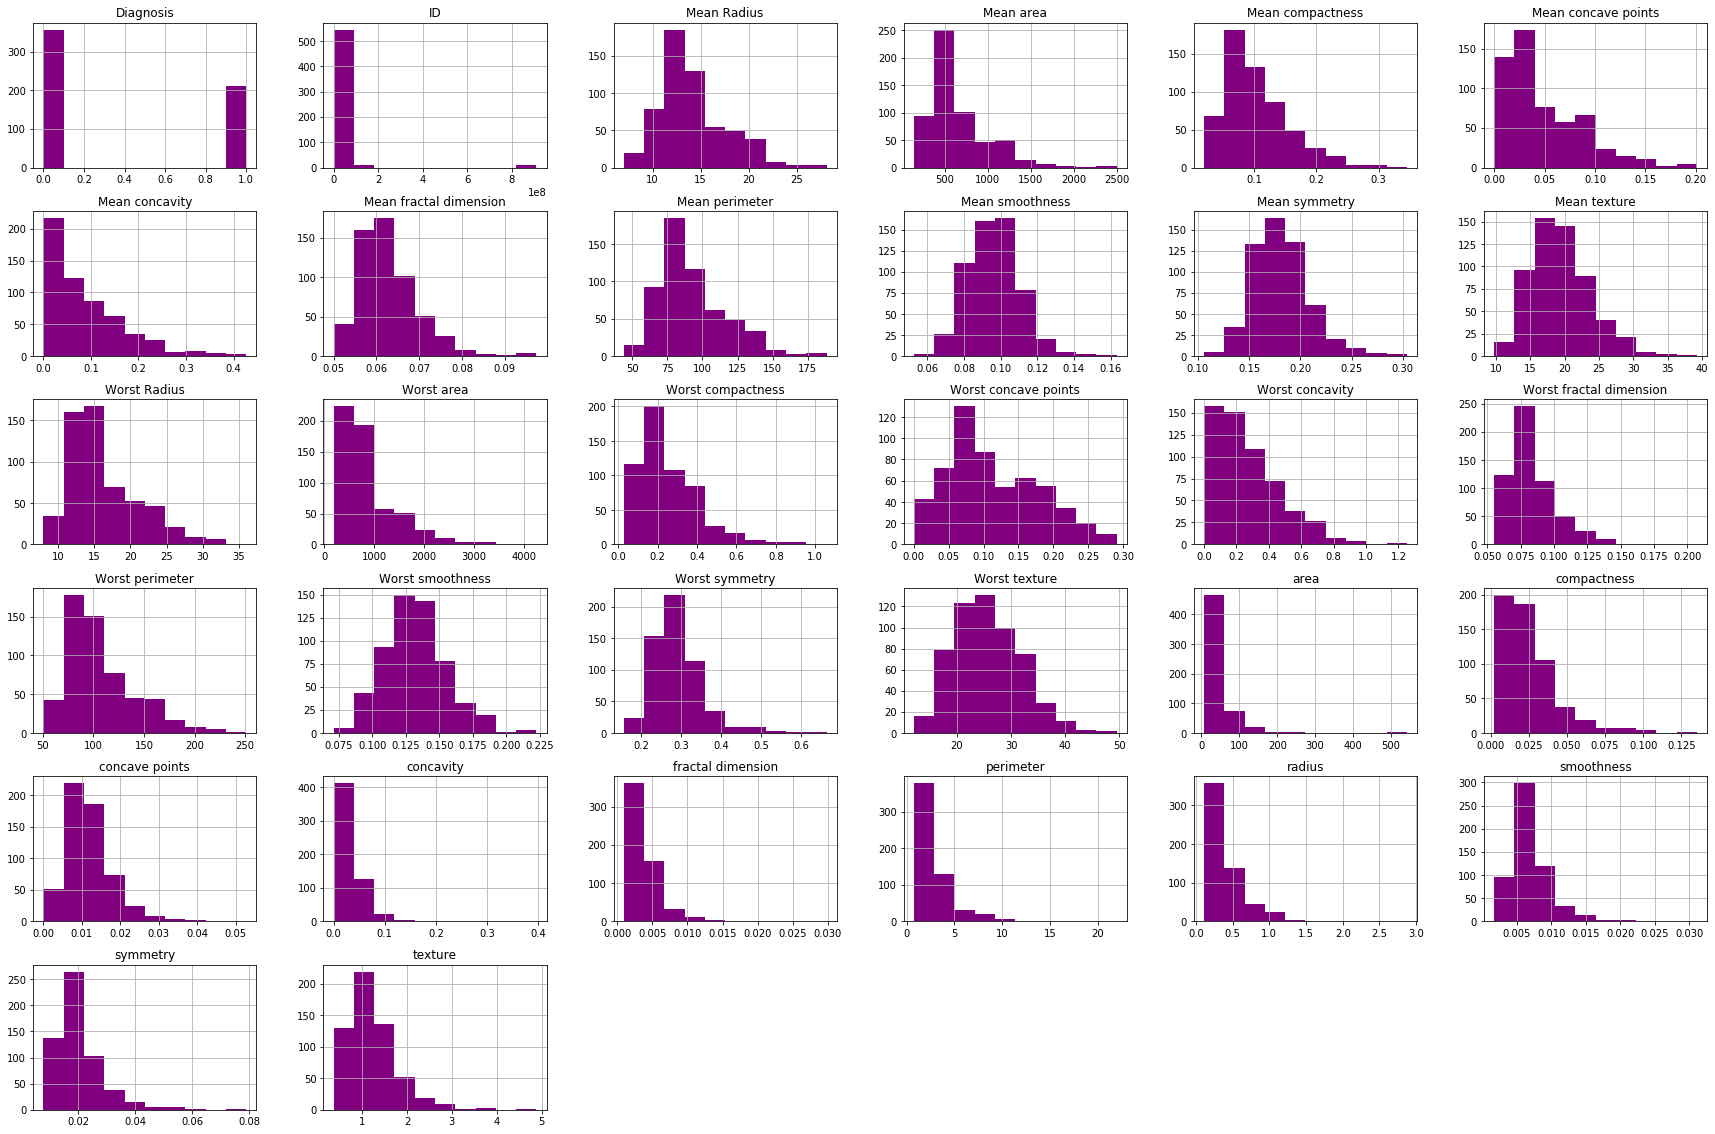

In [9]:
df.hist(bins=10, color='purple' ,figsize=(30,20))
plt.show()

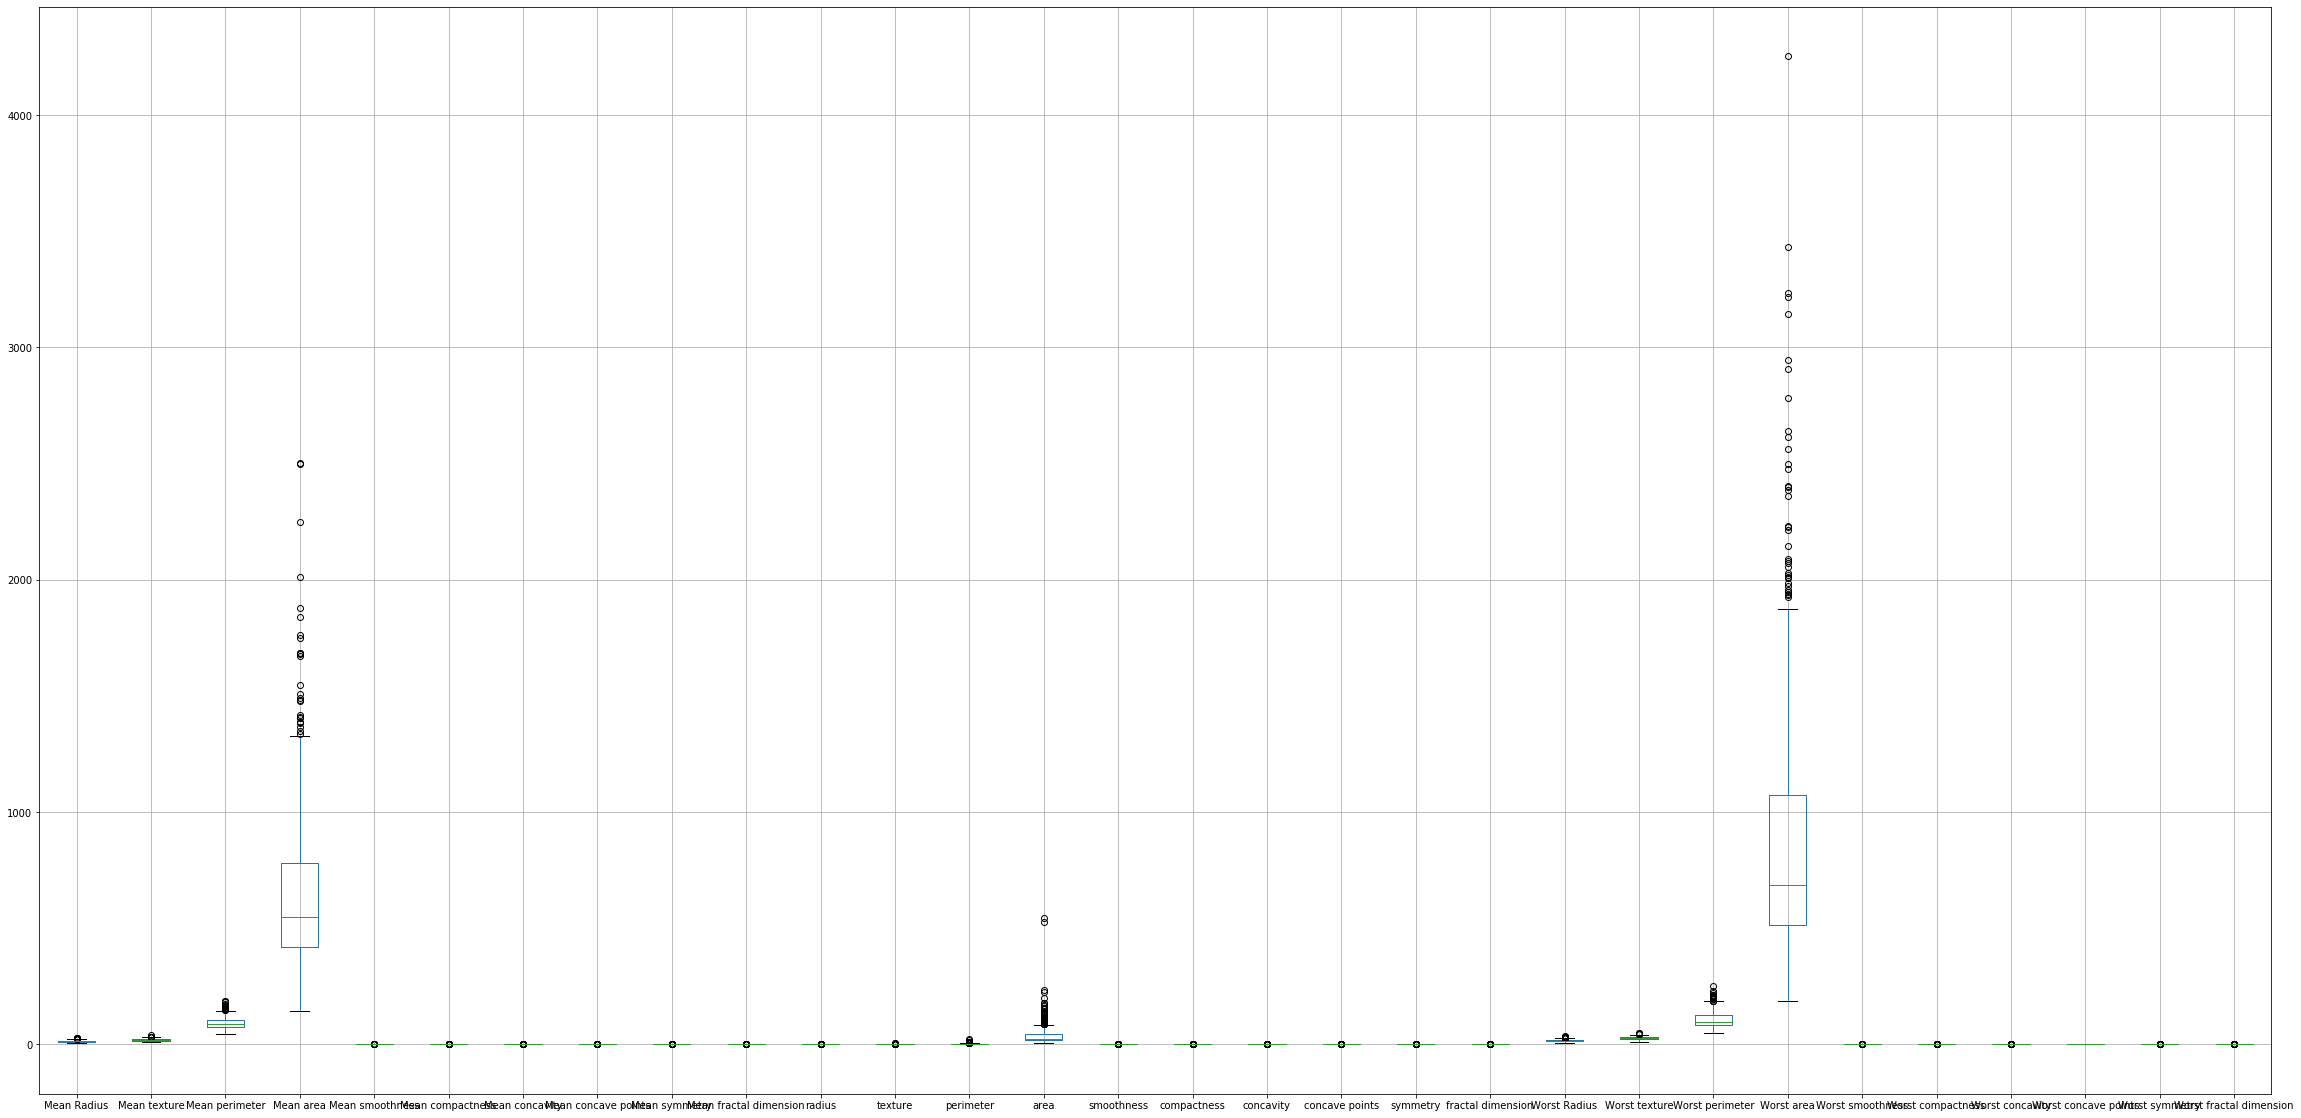

In [10]:
df.boxplot(column=["Mean Radius","Mean texture","Mean perimeter","Mean area","Mean smoothness","Mean compactness","Mean concavity","Mean concave points","Mean symmetry","Mean fractal dimension",
            "radius","texture","perimeter","area","smoothness","compactness","concavity","concave points","symmetry","fractal dimension",
            "Worst Radius","Worst texture","Worst perimeter","Worst area","Worst smoothness","Worst compactness","Worst concavity","Worst concave points","Worst symmetry","Worst fractal dimension"],figsize=(40,20))
plt.show()

In [11]:
df.corr().style.background_gradient(cmap='coolwarm')

,ID,Diagnosis,Mean Radius,Mean texture,Mean perimeter,Mean area,Mean smoothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,Mean fractal dimension,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,Worst Radius,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
ID,1,0.0403705,0.0751664,0.0992883,0.0737964,0.0973904,-0.0123428,0.00147647,0.0515067,0.0454718,-0.0212845,-0.0518077,0.144884,-0.00776402,0.139506,0.179768,0.0967002,0.0345636,0.055569,0.0790774,-0.0168486,0.0261231,0.0834566,0.0642616,0.0813294,0.108408,0.0108993,-0.00189055,0.0241768,0.0362999,-0.0433714,-0.0291573
Diagnosis,0.0403705,1,0.729376,0.422146,0.741887,0.708389,0.356276,0.595587,0.695648,0.776369,0.327336,-0.0180992,0.565373,-0.0070243,0.554416,0.546343,-0.0666286,0.290866,0.252567,0.407293,-0.0091705,0.0760679,0.775725,0.461443,0.78247,0.732925,0.419731,0.589453,0.658348,0.793181,0.413382,0.320983
Mean Radius,0.0751664,0.729376,1,0.329383,0.997876,0.987344,0.168094,0.505129,0.676557,0.823165,0.144236,-0.317749,0.678711,-0.0963549,0.67419,0.735854,-0.222432,0.203984,0.193099,0.375435,-0.106777,-0.0444726,0.969964,0.30044,0.966231,0.941537,0.117392,0.411329,0.525454,0.744025,0.159877,0.00333921
Mean texture,0.0992883,0.422146,0.329383,1,0.335918,0.326193,-0.017769,0.252038,0.315248,0.30559,0.0801457,-0.0687715,0.287615,0.385865,0.295219,0.271431,0.00585505,0.197833,0.146559,0.16696,0.0133867,0.0580305,0.361964,0.91202,0.369573,0.353434,0.0827145,0.290229,0.311122,0.306278,0.116263,0.127177
Mean perimeter,0.0737964,0.741887,0.997876,0.335918,1,0.986548,0.204505,0.555676,0.715662,0.851338,0.1791,-0.268103,0.690955,-0.085643,0.692689,0.74454,-0.202511,0.248532,0.22689,0.406473,-0.0844156,-0.00756767,0.969675,0.307013,0.971157,0.941735,0.148059,0.453304,0.562165,0.770783,0.184458,0.0469094
Mean area,0.0973904,0.708389,0.987344,0.326193,0.986548,1,0.174838,0.497981,0.686232,0.824246,0.148219,-0.28856,0.732879,-0.0653747,0.727493,0.800829,-0.166555,0.210802,0.206677,0.371635,-0.0746378,-0.0214929,0.963319,0.290565,0.96044,0.959952,0.121543,0.388554,0.511392,0.722009,0.139856,0.000382235
Mean smoothness,-0.0123428,0.356276,0.168094,-0.017769,0.204505,0.174838,1,0.657741,0.519002,0.551009,0.555259,0.582435,0.296856,0.0701391,0.290958,0.241523,0.333703,0.316475,0.247046,0.37982,0.198262,0.281917,0.209018,0.0399769,0.234093,0.202344,0.804667,0.46909,0.431727,0.500119,0.390161,0.496684
Mean compactness,0.00147647,0.595587,0.505129,0.252038,0.555676,0.497981,0.657741,1,0.881619,0.82905,0.598095,0.560161,0.490415,0.0499629,0.541495,0.447968,0.137857,0.739278,0.572048,0.644837,0.225748,0.507276,0.531125,0.258877,0.585188,0.504612,0.564204,0.864097,0.815021,0.81381,0.502439,0.684961
Mean concavity,0.0515067,0.695648,0.676557,0.315248,0.715662,0.686232,0.519002,0.881619,1,0.920462,0.495525,0.329768,0.627609,0.0793739,0.655856,0.612945,0.10019,0.669304,0.69251,0.68469,0.173926,0.448172,0.685826,0.308645,0.726703,0.673187,0.446155,0.751937,0.883184,0.859918,0.401782,0.510736
Mean concave points,0.0454718,0.776369,0.823165,0.30559,0.851338,0.824246,0.551009,0.82905,0.920462,1,0.457171,0.158464,0.694661,0.0241433,0.707006,0.686826,0.0287715,0.488058,0.438624,0.616413,0.0908483,0.255168,0.829188,0.301004,0.854468,0.80812,0.450145,0.663532,0.750169,0.909272,0.368009,0.363277


#Part Three : Data Preprocessing

In [0]:
def normalize(df):
    result = df.copy()
    temp=df.copy()
    del temp['ID']
    del temp['Diagnosis']
    for feature_name in temp.columns:
        max_value = temp[feature_name].max()
        min_value = temp[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
df=normalize(df)

In [13]:
df


,ID,Diagnosis,Mean Radius,Mean texture,Mean perimeter,Mean area,Mean smoothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,Mean fractal dimension,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,Worst Radius,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
0,842517,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
1,84300903,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
2,84348301,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
3,84358402,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
4,843786,1,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,0.551179,0.080753,0.117132,0.068793,0.038080,0.197063,0.234311,0.092727,0.215382,0.193730,0.144660,0.268232,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,0.385479,0.197976,0.325873,0.283710,0.291906,0.200213,0.131263,0.464861,0.045843,0.115536,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
564,926682,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,0.236828,0.464728,0.209490,0.172279,0.137879,0.165064,0.099747,0.317863,0.156160,0.055387,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
565,926954,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,0.124896,0.157974,0.125713,0.077976,0.142435,0.263301,0.119444,0.294942,0.074548,0.103547,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
566,927241,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,0.222524,0.272896,0.236300,0.148335,0.163477,0.445579,0.179722,0.315211,0.216103,0.182766,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


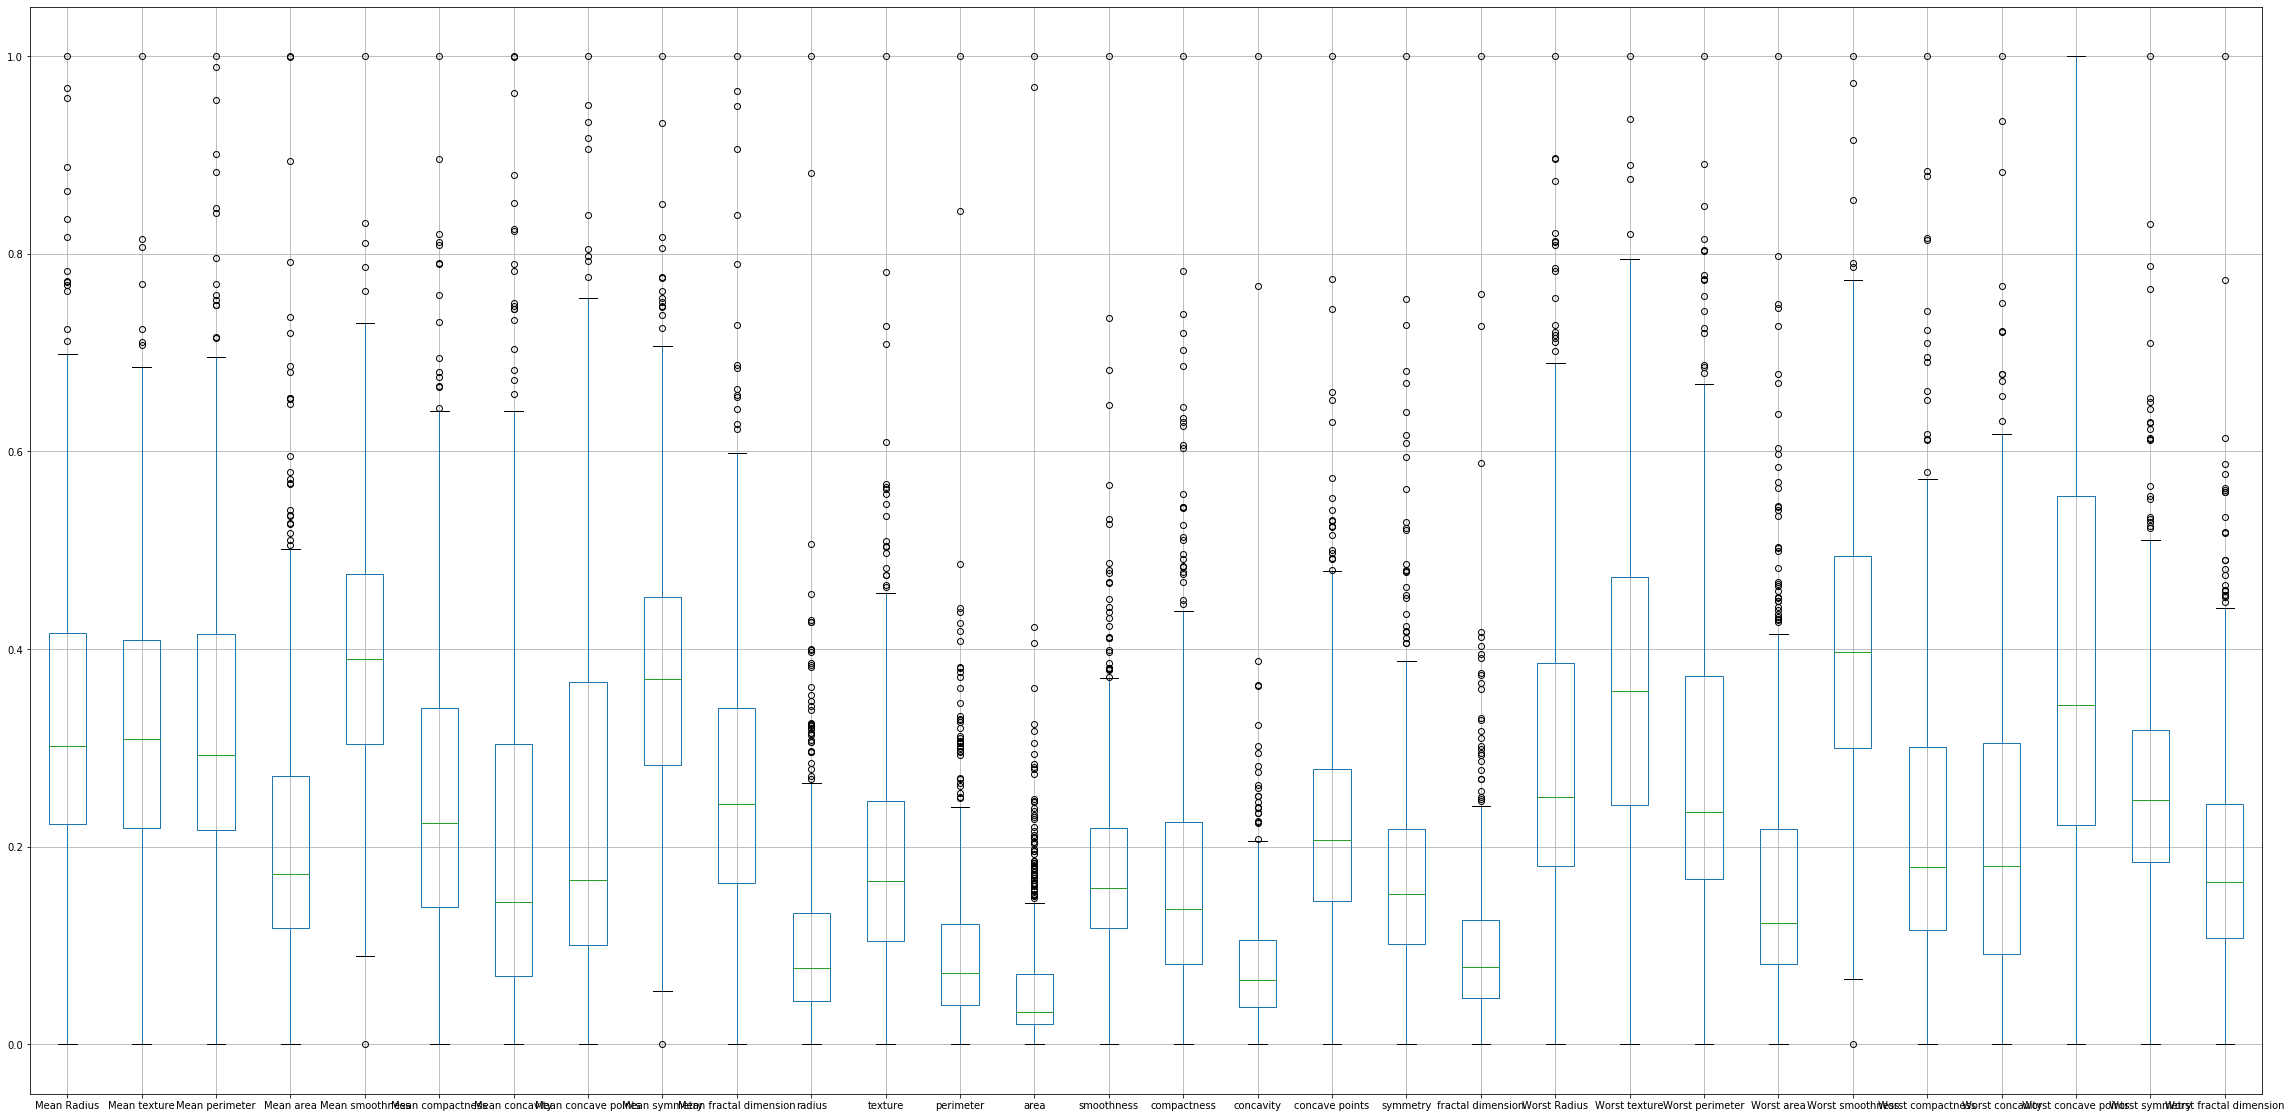

In [14]:
df.boxplot(column=["Mean Radius","Mean texture","Mean perimeter","Mean area","Mean smoothness","Mean compactness","Mean concavity","Mean concave points","Mean symmetry","Mean fractal dimension",
            "radius","texture","perimeter","area","smoothness","compactness","concavity","concave points","symmetry","fractal dimension",
            "Worst Radius","Worst texture","Worst perimeter","Worst area","Worst smoothness","Worst compactness","Worst concavity","Worst concave points","Worst symmetry","Worst fractal dimension"],figsize=(40,20))


In [0]:
from sklearn.preprocessing import LabelEncoder
x= df.drop('Diagnosis',axis=1)
y=df['Diagnosis']
y = LabelEncoder().fit_transform(y)

#Part Four : Data Splitting (Stratified)

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
split.split(x,y)
for train_index, test_index in split.split(x, y):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]
print('Training set has {} samples'.format(len(x_train)))
print('Testing set has {} samples'.format(len(x_test)))

Training set has 397 samples
Testing set has 171 samples


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.388527,0.994000,0.987067,0.209140,0.471683,0.562525,0.793623,0.232011,0.092799
1,0.388527,1.000000,0.392972,0.380725,0.247342,0.379344,0.371455,0.379883,0.236814,0.239879
2,0.994000,0.392972,1.000000,0.980787,0.230290,0.520028,0.604166,0.820838,0.260508,0.136410
3,0.987067,0.380725,0.980787,1.000000,0.203196,0.445974,0.541774,0.761187,0.214950,0.087893
4,0.209140,0.247342,0.230290,0.203196,1.000000,0.573422,0.518974,0.538305,0.538344,0.614784
5,0.471683,0.379344,0.520028,0.445974,0.573422,1.000000,0.889864,0.789032,0.632477,0.830075
6,0.562525,0.371455,0.604166,0.541774,0.518974,0.889864,1.000000,0.841603,0.540603,0.701805
7,0.793623,0.379883,0.820838,0.761187,0.538305,0.789032,0.841603,1.000000,0.506182,0.504539
8,0.232011,0.236814,0.260508,0.214950,0.538344,0.632477,0.540603,0.506182,1.000000,0.565292
9,0.092799,0.239879,0.136410,0.087893,0.614784,0.830075,0.701805,0.504539,0.565292,1.000000


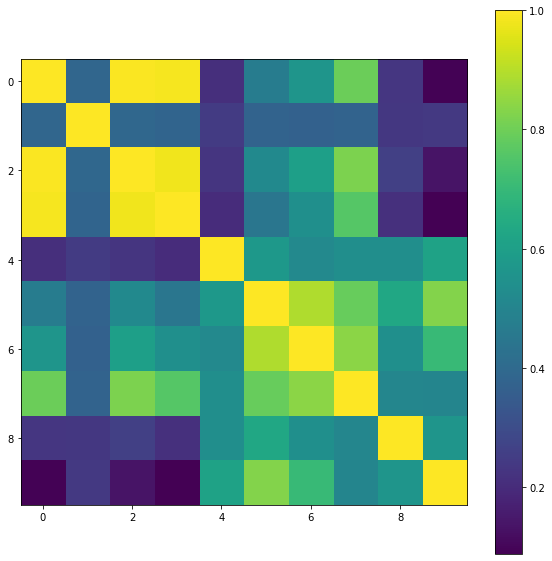

In [9]:
#feature selection train data
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
bestSel_train = pd.DataFrame(SelectKBest(k=10).fit_transform(x_train,x_train.iloc[:,0]))
Sel_train_corr = bestSel_train.corr(method="pearson")
display(Sel_train_corr)
plt.figure(figsize=(10,10))
plt.imshow(Sel_train_corr)
plt.colorbar()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.316385,0.993445,0.980029,0.224478,0.471679,0.589751,0.770007,0.246970,0.076400
1,0.316385,1.000000,0.329712,0.297468,0.181586,0.346876,0.387886,0.341563,0.260870,0.179631
2,0.993445,0.329712,1.000000,0.972912,0.241169,0.535165,0.639142,0.801915,0.262388,0.124359
3,0.980029,0.297468,0.972912,1.000000,0.213999,0.410347,0.539042,0.716940,0.172058,0.041751
4,0.224478,0.181586,0.241169,0.213999,1.000000,0.550519,0.511445,0.564656,0.381294,0.623979
5,0.471679,0.346876,0.535165,0.410347,0.550519,1.000000,0.895311,0.822588,0.555711,0.757788
6,0.589751,0.387886,0.639142,0.539042,0.511445,0.895311,1.000000,0.881816,0.502368,0.645341
7,0.770007,0.341563,0.801915,0.716940,0.564656,0.822588,0.881816,1.000000,0.480991,0.523257
8,0.246970,0.260870,0.262388,0.172058,0.381294,0.555711,0.502368,0.480991,1.000000,0.449054
9,0.076400,0.179631,0.124359,0.041751,0.623979,0.757788,0.645341,0.523257,0.449054,1.000000


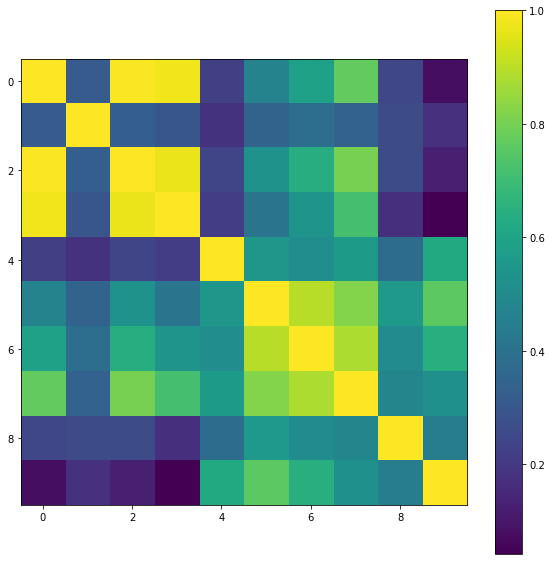

In [10]:
#feature selection test data
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
bestSel_test = pd.DataFrame(SelectKBest(k=10).fit_transform(x_test,x_test.iloc[:,0]))
Sel_test_corr = bestSel_test.corr(method="pearson")
display(Sel_test_corr)
plt.figure(figsize=(10,10))
plt.imshow(Sel_test_corr)
plt.colorbar()

#Part Five : Data Classification

1) k-nearest neighbour classifier

In [0]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifer object
classifier = KNeighborsClassifier(n_neighbors=5)

# Train  Classifer
classifier.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)


In [12]:
#predict KNN with n_neighbours = 5 metrics and accuracy
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
print("Report : \n",classification_report(y_test, y_pred))

Accuracy: 0.6608187134502924
Confusion Matrix : 
 [[88 19]
 [39 25]]
Report : 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75       107
           1       0.57      0.39      0.46        64

    accuracy                           0.66       171
   macro avg       0.63      0.61      0.61       171
weighted avg       0.65      0.66      0.64       171



In [0]:
error = []
import numpy as np

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

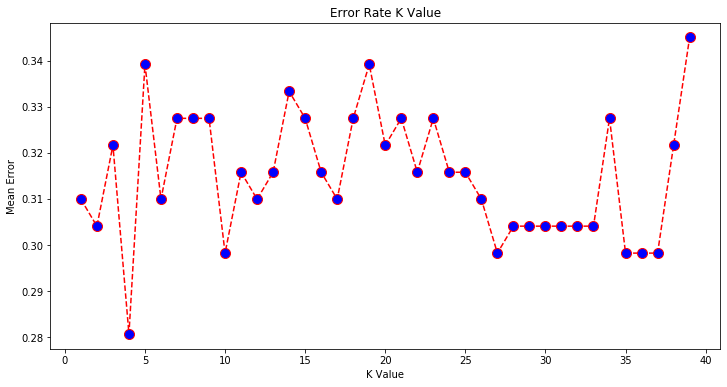

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

2)SVM classifier

In [14]:
from sklearn import svm
classifier = svm.LinearSVC(C = 1)
# Train  Classifer
classifier.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
#predict linear with C = 1 metrics and accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
print("Report : \n",classification_report(y_test, y_pred))

Accuracy: 0.6257309941520468
Confusion Matrix : 
 [[107   0]
 [ 64   0]]
Report : 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       107
           1       0.00      0.00      0.00        64

    accuracy                           0.63       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.39      0.63      0.48       171



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# Calculating error for C values between .001 and 100
C=[.001,.01,.1,1,10]
error = []

for i in C:
    clf = svm.LinearSVC(C=i)
    clf.fit(x_train, y_train)
    pred_i = clf.predict(x_test)
    error.append(np.mean(pred_i != y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Mean Error')

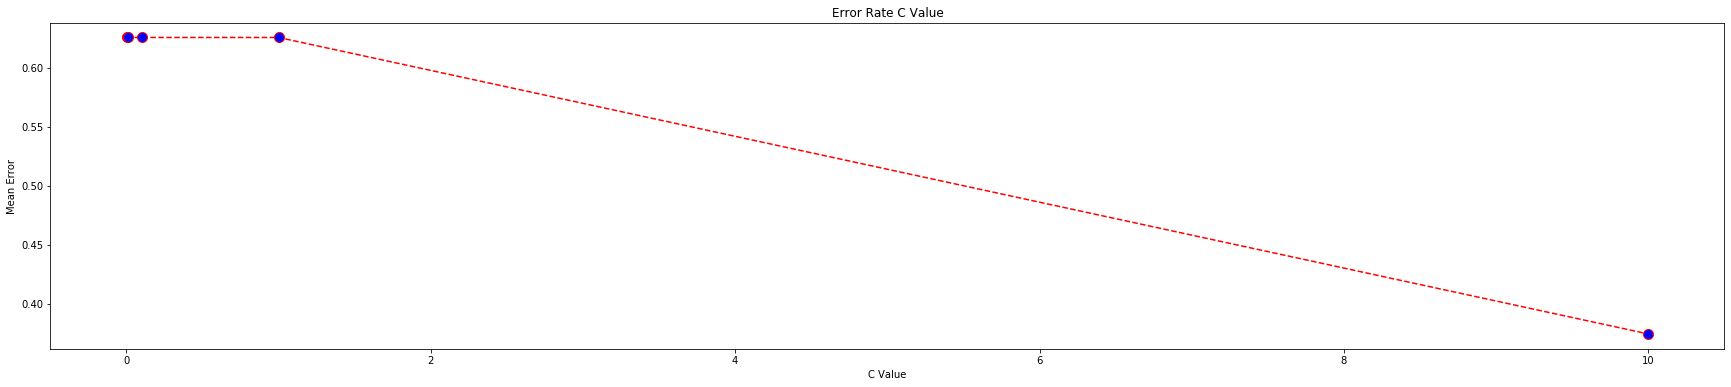

In [26]:
plt.figure(figsize=(30, 6))
plt.plot(C, error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate C Value')
plt.xlabel('C Value')
plt.ylabel('Mean Error')

3) NON-Linear SVM

In [0]:
classifier = svm.SVC(kernel='rbf',gamma='auto',C = 1)
# Train  Classifer
classifier.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)

In [28]:
#predict non linear svm with C = 1 metrics and accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
print("Report : \n",classification_report(y_test, y_pred))

Accuracy: 0.6257309941520468
Confusion Matrix : 
 [[104   3]
 [ 61   3]]
Report : 
               precision    recall  f1-score   support

           0       0.63      0.97      0.76       107
           1       0.50      0.05      0.09        64

    accuracy                           0.63       171
   macro avg       0.57      0.51      0.43       171
weighted avg       0.58      0.63      0.51       171



4)Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(C=1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
print("Report : \n",classification_report(y_test, y_pred))

Accuracy: 0.6257309941520468
Confusion Matrix : 
 [[107   0]
 [ 64   0]]
Report : 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       107
           1       0.00      0.00      0.00        64

    accuracy                           0.63       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.39      0.63      0.48       171



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


5)ADABoost Classifier

In [0]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [0]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Report:")
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9707602339181286
Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[107   0]
 [  5  59]]


random forest

6)Random Forest Classifier

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a random forest Classifier
clf=RandomForestClassifier(n_estimators=100,max_depth=10)

#Train the model 
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Report:")
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       107
           1       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

[[103   4]
 [  5  59]]


#Part Six : parameter tuning using cross validation

1)KNN Tuning for Parameter n_neighbours

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

grid_param = {
    'n_neighbors': [1,5,10,15,20,25,30,35,40]
}
gd_sr = GridSearchCV(estimator= KNeighborsClassifier(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,refit=True,
                     n_jobs=-1)
gd_sr.fit(x_train,y_train)
best_param=gd_sr.best_params_
print("best n_neighbours in KNN is : ",best_param)
best_result=gd_sr.best_score_
print("best accuracy in KNN is : ",best_result)



best n_neighbours in KNN is :  {'n_neighbors': 10}
best accuracy in KNN is :  0.7027707808564232


In [34]:
#reclassify using best param n_neighbors=10
clf=KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Report:")
print(metrics.classification_report(y_test, y_pred))
print("confusion matrix : \n",metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.7017543859649122
Report:
              precision    recall  f1-score   support

           0       0.68      0.97      0.80       107
           1       0.84      0.25      0.39        64

    accuracy                           0.70       171
   macro avg       0.76      0.61      0.59       171
weighted avg       0.74      0.70      0.65       171

confusion matrix : 
 [[104   3]
 [ 48  16]]


2)Linear SVM Parameter Tuning for C

In [44]:
grid_param = {
    'C': [.001,.01,.1,1,10,100]
}
gd_sr = GridSearchCV(estimator= svm.LinearSVC(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,refit=True,
                     n_jobs=-1)
gd_sr.fit(x_train,y_train)
best_param=gd_sr.best_params_
print("best C in linear SVM is : ",best_param)
best_result=gd_sr.best_score_
print("best accuracy in linear SVM is : ",best_result)

best C in linear SVM is :  {'C': 1}
best accuracy in linear SVM is :  0.5768261964735516


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [46]:
#reclassify using best param C=1
clf=svm.LinearSVC(C=1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Report:")
print(metrics.classification_report(y_test, y_pred))
print("confusion matrix : \n",metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.6257309941520468
Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       107
           1       0.00      0.00      0.00        64

    accuracy                           0.63       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.39      0.63      0.48       171

confusion matrix : 
 [[107   0]
 [ 64   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


3)Non Linear SVM with RBF Kernel Tuning for both C and Gamma

In [47]:
grid_param = {
    'C': [.001,.01,.1,1,10,100],
    'gamma':[1e-08,1e-07,1e-06,1e-05,1e-04,1e-03,.01,.1,1,10,100,1000]
}
gd_sr = GridSearchCV(estimator= svm.SVC(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,refit=True,
                     n_jobs=-1)
gd_sr.fit(x_train,y_train)
best_param=gd_sr.best_params_
print("best C and gamma in non linear SVM is : ",best_param)
best_result=gd_sr.best_score_
print("best accuracy in non linear SVM is : ",best_result)

best C and gamma in non linear SVM is :  {'C': 100, 'gamma': 1e-08}
best accuracy in non linear SVM is :  0.6977329974811083


In [49]:
#reclassify using best param C=100,gamma = 1e-8
clf=svm.SVC(C=100,gamma=1e-8)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Report:")
print(metrics.classification_report(y_test, y_pred))
print("confusion matrix : \n",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7309941520467836
Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       107
           1       0.70      0.48      0.57        64

    accuracy                           0.73       171
   macro avg       0.72      0.68      0.69       171
weighted avg       0.73      0.73      0.72       171

confusion matrix : 
 [[94 13]
 [33 31]]


4)Logistic Regression Tuning for Parameter C

In [52]:
grid_param = {
    'C': [1e-08,1e-07,1e-06,1e-05,1e-04,1e-03,.01,.1,1,10,100,1000]
}
gd_sr = GridSearchCV(estimator= LogisticRegression(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,refit=True,
                     n_jobs=-1)
gd_sr.fit(x_train,y_train)
best_param=gd_sr.best_params_
print("best C in Logistic Regression is : ",best_param)
best_result=gd_sr.best_score_
print("best accuracy in Logistic Regresion is : ",best_result)

best C in Logistic Regression is :  {'C': 1e-08}
best accuracy in Logistic Regresion is :  0.5793450881612091


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
#reclassify using best param C = 1e-8
clf=LogisticRegression(C=1e-8)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Report:")
print(metrics.classification_report(y_test, y_pred))
print("confusion matrix : \n",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.6257309941520468
Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       107
           1       0.00      0.00      0.00        64

    accuracy                           0.63       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.39      0.63      0.48       171

confusion matrix : 
 [[107   0]
 [ 64   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


decision tree classifier

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import cross_val_score

grid_param = {
    'max_depth': [4,5,6,7,10],
    'criterion': ['entropy'],
    #'bootstrap': [True, False]
}

gd_sr = GridSearchCV(estimator= DecisionTreeClassifier(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,refit=True,
                     n_jobs=-1)

all_accuracies = cross_val_score(estimator=gd_sr, X=X_train, y=y_train, cv=5)

print("all accuracy from cross validation",all_accuracies)
print("mean of all accuracy",all_accuracies.mean())
print("standard deviation of all accuracy",all_accuracies.std())


#print best parameter
#best_parameters = gd_sr.best_params_
#print("Best parameter in decision tree ",best_parameters)
#print best result
#best_result = gd_sr.best_score_
#print(best_result)
gd_sr.set_params

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


all accuracy from cross validation [0.91860465 0.96470588 0.94117647 0.90588235 0.92941176]
mean of all accuracy 0.9319562243502052
standard deviation of all accuracy 0.0201103883189814


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<bound method BaseEstimator.set_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [4, 5, 

random forest param tuning

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

grid_param = {
    'n_estimators': [1,2,5,10,15],
    'learning_rate': [.2,.5,.7,1],
}

gd_sr = GridSearchCV(estimator= AdaBoostClassifier(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

all_accuracies = cross_val_score(estimator=gd_sr, X=X_train, y=y_train, cv=5)

print("all accuracy from cross validation",all_accuracies)
print("mean of all accuracy",all_accuracies.mean())
print("standard deviation of all accuracy",all_accuracies.std())

#gd_sr.fit(X_train, y_train)

#print best parameter
best_parameters = gd_sr.best_params_
print("Best parameter in Random Forest ",best_parameters)
#print best result
#best_result = gd_sr.best_score_
#print(best_result)

KeyboardInterrupt: ignored

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_depth': [5,7,10],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

gd_sr = GridSearchCV(estimator= RandomForestClassifier(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

all_accuracies = cross_val_score(estimator=gd_sr, X=X_test, y=y_test, cv=5)

print("all accuracy from cross validation",all_accuracies)
print("mean of all accuracy",all_accuracies.mean())
print("standard deviation of all accuracy",all_accuracies.std())

#gd_sr.fit(X_train, y_train)

#print best parameter
best_parameters = gd_sr.best_params_
print("Best parameter in Random Forest ",best_parameters)
#print best result
#best_result = gd_sr.best_score_
#print(best_result)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
